NIGERIA AT 62: A Twitter Sentiment Analysis Project

Akande John Ayanfe

1. Introduction

As Nigeria celebrated her Independence on the 1st of October, 2022, this Sentiment Analysis Project which focuses on “Nigeria At 62” data using Natural Language Processing (NLP) was carried out to know the Nigerians’ objective opinions about the celebration.  The nation Nigeria has faced several hardships even after gaining her independence 62 years ago, many of which can be traced to bad governance, I decided to gather tweets that had both the words "Independence" and "Nigeria", or “Happy Independence Day” or “Nigeria at 62” phrases in them using Snscrape Library. I gathered over 32K tweets. Several other python libraries were employed in this analysis. Python libraries such as
•	Pandas (for Data Cleaning/Manipulation)
•	NLTK (Natural Language Toolkit)
•	TextBlob (for Sentiment Analysis)
•	Emot (for Emojis identification)
•	MatPlotlib & WordCloud (for Data Visualization)

Table of Contents
1.	Introduction
2.	Data Gathering
3.	Data Assessment
4.	Data Cleaning
5.	Data Preprocessing
6.	Sentiment Analysis
7.	Explanatory Analysis/ Data Visualization
8.	Additional Comments

2. Data Gathering
•	Querying twitter for data, making use of Snscrape Library; the data will be gathered in batches, a batch per day.
•	Storing gathered data into individual csv files, then later appended as a single dataframe.
•	Data will be gathered within the 30th of September and the 2nd  October (3days)

 I prefer to gather tweets in batches then append, to save time and monitor data gathering effectively

Importing Libraries...

In [2]:
 # Importing all packages i will be needing 

import pandas as pd
from numpy import random
import random
from IPython.display import IFrame
import snscrape.modules.twitter as sntwitter




from tkinter import N
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import words 
from nltk.stem.porter import PorterStemmer
lemmatizer = WordNetLemmatizer



import string
import re
import textblob
from textblob import TextBlob
import nltk


from collections import Counter
import warnings
import matplotlib_inline
from datetime import date
from emot.emo_unicode import UNICODE_EMOJI
#from emot.emo_unicode import EMOTICONS_EMO
from emoji import EMOJI_DATA


from wordcloud import ImageColorGenerator
from PIL import Image
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import IFrame

In [3]:
# Creating keywords to search for, filter links, retweets, replies

query_1 = "Nigeria Independence until:2022-10-01 since:2022-09-30"
query_2 = "Nigeria Independence until:2022-10-02 since:2022-10-01"
query_3 = "Nigeria Independence until:2022-10-03 since:2022-10-02"


# Specifying limit of 40,000 tweets
limit = 40000

# Specifying column headers of each tweet attribute
columns=['Date', 'ID','Url', 'Username', 'Source_Location', 'Location',  'Tweets', 'Number_of_Likes', 'Number_of_Followers',  'Number_of_Retweets']

In [4]:

tweets = []

for i, tweet in enumerate(sntwitter.TwitterSearchScraper(query_1).get_items()):
    if len(tweets) == limit:
        break
    else:
        tweets.append([tweet.date, tweet.id, tweet.url, tweet.user.username, tweet.sourceLabel, tweet.user.location, tweet.content, tweet.likeCount, tweet.user.followersCount, tweet.retweetCount]) 

In [5]:
# Creating a dataframe
tweets_df1 = pd.DataFrame(tweets, columns=columns)
tweets_df1

Date                   ID  \
0    2022-09-30 23:59:58+00:00  1575998923189014528   
1    2022-09-30 23:59:54+00:00  1575998906491887616   
2    2022-09-30 23:59:52+00:00  1575998896354254849   
3    2022-09-30 23:59:50+00:00  1575998889748201472   
4    2022-09-30 23:59:45+00:00  1575998869627813889   
...                        ...                  ...   
2314 2022-09-30 00:23:51+00:00  1575642543382941696   
2315 2022-09-30 00:17:15+00:00  1575640886066950144   
2316 2022-09-30 00:05:03+00:00  1575637812812316672   
2317 2022-09-30 00:02:33+00:00  1575637183049781249   
2318 2022-09-30 00:00:09+00:00  1575636580814843904   

                                                    Url        Username  \
0     https://twitter.com/Best0000051/status/1575998...     Best0000051   
1     https://twitter.com/barrygraphy/status/1575998...     barrygraphy   
2     https://twitter.com/ConnectAbujaNG/status/1575...  ConnectAbujaNG   
3     https://twitter.com/Rotor_Man/status/157599888...       Rotor_Man   
4     https://twitter.com/benobioma/status/157599886...       benobioma   
...                                                 ...             ...   
2314  https://twitter.com/Kas_Nwuke/status/157564254...       Kas_Nwuke   
2315  https://twitter.com/Nattygrany/status/15756408...      Nattygrany   
2316  https://twitter.com/BillionBest1/status/157563...    BillionBest1   
2317  https://twitter.com/BriannaWu__/status/1575637...     BriannaWu__   
2318  https://twitter.com/fesi2012/status/1575636580...        fesi2012   

          Source_Location                 Location  \
0      Twitter for iPhone                            
1      Twitter for iPhone          Jigawa, Nigeria   
2     Twitter for Android                            
3     Twitter for Android           Lagos, Nigeria   
4     Twitter for Android                  Nigeria   
...                   ...                      ...   
2314      Twitter Web App  Planet Earth, Milky Way   
2315   Twitter for iPhone                    Abuja   
2316  Twitter for Android           Warri, Nigeria   
2317  Twitter for Android               Dedham, MA   
2318  Twitter for Android                            

                                                 Tweets  Number_of_Likes  \
0             Happy Independence to my Country Nigeria,                1   
1     Happy Independence Day Nigeria🇳🇬!\nNigeria wit...                1   
2     Happy Independence to Our Beautiful Mother Lan...                1   
3     God Bless Nigeria 🇳🇬\n\nThe country filled wit...                1   
4     Happy Independence Nigeria.\n62years of God's ...                1   
...                                                 ...              ...   
2314  @OselokaHObaze @PeterObi @ucheconfi @FS_Yusuf_...                0   
2315  @Haroon_Siddique Infact not alleged,we all sho...                4   
2316  @AirtelNigeria Happy independence day 🇳🇬💯💎 to ...                0   
2317  @Tinsnilloc @Morris_Monye But how did CNN get ...                0   
2318  @SEnuechusue @the_fisherman11 @NgLabour @Chude...                0   

      Number_of_Followers  Number_of_Retweets  
0                     118                   0  
1                     327                   0  
2                       2                   0  
3                     274                   0  
4                     256                   0  
...                   ...                 ...  
2314                  490                   0  
2315                  248                   3  
2316                  867                   0  
2317                   12                   0  
2318                  143                   0  

[2319 rows x 10 columns]

In [8]:
# Saving dataframe to a csv file
tweets_df1.to_csv('OCT_1st_df1.csv')

In [2]:
tweets_df1 = pd.read_csv('OCT_1st_df1.csv')

In [4]:
tweets_df1

Date            ID  \
0     2022-09-30 23:59:58+00:00  1.576000e+18   
1     2022-09-30 23:59:54+00:00  1.576000e+18   
2     2022-09-30 23:59:52+00:00  1.576000e+18   
3     2022-09-30 23:59:50+00:00  1.576000e+18   
4     2022-09-30 23:59:45+00:00  1.576000e+18   
...                         ...           ...   
2314  2022-09-30 00:23:51+00:00  1.575640e+18   
2315  2022-09-30 00:17:15+00:00  1.575640e+18   
2316  2022-09-30 00:05:03+00:00  1.575640e+18   
2317  2022-09-30 00:02:33+00:00  1.575640e+18   
2318  2022-09-30 00:00:09+00:00  1.575640e+18   

                                                    Url        Username  \
0     https://twitter.com/Best0000051/status/1575998...     Best0000051   
1     https://twitter.com/barrygraphy/status/1575998...     barrygraphy   
2     https://twitter.com/ConnectAbujaNG/status/1575...  ConnectAbujaNG   
3     https://twitter.com/Rotor_Man/status/157599888...       Rotor_Man   
4     https://twitter.com/benobioma/status/157599886...       benobioma   
...                                                 ...             ...   
2314  https://twitter.com/Kas_Nwuke/status/157564254...       Kas_Nwuke   
2315  https://twitter.com/Nattygrany/status/15756408...      Nattygrany   
2316  https://twitter.com/BillionBest1/status/157563...    BillionBest1   
2317  https://twitter.com/BriannaWu__/status/1575637...     BriannaWu__   
2318  https://twitter.com/fesi2012/status/1575636580...        fesi2012   

          Source_Location                 Location  \
0      Twitter for iPhone                      NaN   
1      Twitter for iPhone          Jigawa, Nigeria   
2     Twitter for Android                      NaN   
3     Twitter for Android           Lagos, Nigeria   
4     Twitter for Android                  Nigeria   
...                   ...                      ...   
2314      Twitter Web App  Planet Earth, Milky Way   
2315   Twitter for iPhone                    Abuja   
2316  Twitter for Android           Warri, Nigeria   
2317  Twitter for Android               Dedham, MA   
2318  Twitter for Android                      NaN   

                                                 Tweets  Number_of_Likes  \
0             Happy Independence to my Country Nigeria,                1   
1     Happy Independence Day Nigeria🇳🇬!\nNigeria wit...                1   
2     Happy Independence to Our Beautiful Mother Lan...                1   
3     God Bless Nigeria 🇳🇬\n\nThe country filled wit...                1   
4     Happy Independence Nigeria.\n62years of God's ...                1   
...                                                 ...              ...   
2314  @OselokaHObaze @PeterObi @ucheconfi @FS_Yusuf_...                0   
2315  @Haroon_Siddique Infact not alleged,we all sho...                4   
2316  @AirtelNigeria Happy independence day 🇳🇬💯💎 to ...                0   
2317  @Tinsnilloc @Morris_Monye But how did CNN get ...                0   
2318  @SEnuechusue @the_fisherman11 @NgLabour @Chude...                0   

      Number_of_Followers  Number_of_Retweets  
0                     118                   0  
1                     327                   0  
2                       2                   0  
3                     274                   0  
4                     256                   0  
...                   ...                 ...  
2314                  490                   0  
2315                  248                   3  
2316                  867                   0  
2317                   12                   0  
2318                  143                   0  

[2319 rows x 10 columns]

In [5]:
tweets = []

for i, tweet in enumerate(sntwitter.TwitterSearchScraper(query_2).get_items()):
    if len(tweets) == limit:
        break
    else:
        tweets.append([tweet.date, tweet.id, tweet.url, tweet.user.username, tweet.sourceLabel, tweet.user.location, tweet.content, tweet.likeCount, tweet.user.followersCount, tweet.retweetCount]) 

In [6]:
# Creating a dataframe
tweets_df2 = pd.DataFrame(tweets, columns=columns)
tweets_df2

Date                   ID  \
0     2022-10-01 23:59:36+00:00  1576361216376995841   
1     2022-10-01 23:59:35+00:00  1576361215084961794   
2     2022-10-01 23:59:33+00:00  1576361203789701120   
3     2022-10-01 23:59:13+00:00  1576361120276676609   
4     2022-10-01 23:58:47+00:00  1576361012420222976   
...                         ...                  ...   
27592 2022-10-01 00:00:15+00:00  1575998994446430208   
27593 2022-10-01 00:00:10+00:00  1575998971935334406   
27594 2022-10-01 00:00:09+00:00  1575998970035257344   
27595 2022-10-01 00:00:05+00:00  1575998951429283840   
27596 2022-10-01 00:00:01+00:00  1575998936510144512   

                                                     Url         Username  \
0      https://twitter.com/Anartista1/status/15763612...       Anartista1   
1      https://twitter.com/SobiaBabar4/status/1576361...      SobiaBabar4   
2      https://twitter.com/todaynewsafrica/status/157...  todaynewsafrica   
3      https://twitter.com/EMMANDU7/status/1576361120...         EMMANDU7   
4      https://twitter.com/Koraplay/status/1576361012...         Koraplay   
...                                                  ...              ...   
27592  https://twitter.com/wahalanodeytra1/status/157...  wahalanodeytra1   
27593  https://twitter.com/adegunna_julius/status/157...  adegunna_julius   
27594  https://twitter.com/Kwara_Spice/status/1575998...      Kwara_Spice   
27595  https://twitter.com/DrMohammadIsrar/status/157...  DrMohammadIsrar   
27596  https://twitter.com/ListenUpWithMrI/status/157...  ListenUpWithMrI   

           Source_Location                  Location  \
0      Twitter for Android                             
1            WordPress.com                             
2           SocialPilot.co            Washington, DC   
3      Twitter for Android                             
4       Twitter for iPhone                Blockchain   
...                    ...                       ...   
27592   Twitter for iPhone             Lagos Nigeria   
27593            Instagram                             
27594   Twitter for iPhone  Rent free in your head.    
27595  Twitter for Android             Kano, Nigeria   
27596    TweetDeck Web App                             

                                                  Tweets  Number_of_Likes  \
0      God I wish the queen had died in Nigeria indep...                2   
1      Rita Dominic, May Edochie, Yewande Adekoya, Ot...                0   
2      BREAKING: United States government reacts to s...                0   
3      It was satisfying celebrating with Peter Obi D...                0   
4      It was indeed an Independence Day in Nigeria #...                0   
...                                                  ...              ...   
27592  Happy Independence Nigeria 🇳🇬 \n\n#nigerianind...                1   
27593  Happy Independence Day Nigeria. https://t.co/w...                0   
27594  Pastor asked us to sing national anthem, NEPA ...                1   
27595  Wishing all the staff and students of this gre...                2   
27596  1960 October 1: On #ThisDayInHistory, #Nigeria...                0   

       Number_of_Followers  Number_of_Retweets  
0                      250                   0  
1                        3                   0  
2                     4487                   0  
3                       42                   0  
4                    38918                   0  
...                    ...                 ...  
27592                   41                   0  
27593                  594                   0  
27594                 3901                   0  
27595                  270                   0  
27596                    6                   0  

[27597 rows x 10 columns]

In [5]:
# Saving dataframe to a csv file
tweets_df2.to_csv('OCT_1st_df2.csv')

In [3]:
tweets_df2 = pd.read_csv('OCT_1st_df2.csv')

In [6]:
tweets_df2

Date            ID  \
0      2022-10-01 23:59:36+00:00  1.576360e+18   
1      2022-10-01 23:59:35+00:00  1.576360e+18   
2      2022-10-01 23:59:33+00:00  1.576360e+18   
3      2022-10-01 23:59:13+00:00  1.576360e+18   
4      2022-10-01 23:58:47+00:00  1.576360e+18   
...                          ...           ...   
27592  2022-10-01 00:00:15+00:00  1.576000e+18   
27593  2022-10-01 00:00:10+00:00  1.576000e+18   
27594  2022-10-01 00:00:09+00:00  1.576000e+18   
27595  2022-10-01 00:00:05+00:00  1.576000e+18   
27596  2022-10-01 00:00:01+00:00  1.576000e+18   

                                                     Url         Username  \
0      https://twitter.com/Anartista1/status/15763612...       Anartista1   
1      https://twitter.com/SobiaBabar4/status/1576361...      SobiaBabar4   
2      https://twitter.com/todaynewsafrica/status/157...  todaynewsafrica   
3      https://twitter.com/EMMANDU7/status/1576361120...         EMMANDU7   
4      https://twitter.com/Koraplay/status/1576361012...         Koraplay   
...                                                  ...              ...   
27592  https://twitter.com/wahalanodeytra1/status/157...  wahalanodeytra1   
27593  https://twitter.com/adegunna_julius/status/157...  adegunna_julius   
27594  https://twitter.com/Kwara_Spice/status/1575998...      Kwara_Spice   
27595  https://twitter.com/DrMohammadIsrar/status/157...  DrMohammadIsrar   
27596  https://twitter.com/ListenUpWithMrI/status/157...  ListenUpWithMrI   

           Source_Location                  Location  \
0      Twitter for Android                       NaN   
1            WordPress.com                       NaN   
2           SocialPilot.co            Washington, DC   
3      Twitter for Android                       NaN   
4       Twitter for iPhone                Blockchain   
...                    ...                       ...   
27592   Twitter for iPhone             Lagos Nigeria   
27593            Instagram                       NaN   
27594   Twitter for iPhone  Rent free in your head.    
27595  Twitter for Android             Kano, Nigeria   
27596    TweetDeck Web App                       NaN   

                                                  Tweets  Number_of_Likes  \
0      God I wish the queen had died in Nigeria indep...                2   
1      Rita Dominic, May Edochie, Yewande Adekoya, Ot...                0   
2      BREAKING: United States government reacts to s...                0   
3      It was satisfying celebrating with Peter Obi D...                0   
4      It was indeed an Independence Day in Nigeria #...                0   
...                                                  ...              ...   
27592  Happy Independence Nigeria 🇳🇬 \n\n#nigerianind...                1   
27593  Happy Independence Day Nigeria. https://t.co/w...                0   
27594  Pastor asked us to sing national anthem, NEPA ...                1   
27595  Wishing all the staff and students of this gre...                2   
27596  1960 October 1: On #ThisDayInHistory, #Nigeria...                0   

       Number_of_Followers  Number_of_Retweets  
0                      250                   0  
1                        3                   0  
2                     4487                   0  
3                       42                   0  
4                    38918                   0  
...                    ...                 ...  
27592                   41                   0  
27593                  594                   0  
27594                 3901                   0  
27595                  270                   0  
27596                    6                   0  

[27597 rows x 10 columns]

In [8]:
tweets = []

for i, tweet in enumerate(sntwitter.TwitterSearchScraper(query_3).get_items()):
    if len(tweets) == limit:
        break
    else:
       tweets.append([tweet.date, tweet.id, tweet.url, tweet.user.username, tweet.sourceLabel, tweet.user.location, tweet.content, tweet.likeCount, tweet.user.followersCount, tweet.retweetCount]) 

In [9]:
# Creating a dataframe
tweets_df3 = pd.DataFrame(tweets, columns=columns)
tweets_df3

Date                   ID  \
0    2022-10-02 23:57:52+00:00  1576723170614190085   
1    2022-10-02 23:57:40+00:00  1576723121008250880   
2    2022-10-02 23:54:09+00:00  1576722235649310722   
3    2022-10-02 23:40:51+00:00  1576718886363439105   
4    2022-10-02 23:40:40+00:00  1576718841664651265   
...                        ...                  ...   
2127 2022-10-02 00:00:52+00:00  1576361536498520064   
2128 2022-10-02 00:00:45+00:00  1576361508170186754   
2129 2022-10-02 00:00:26+00:00  1576361429149528065   
2130 2022-10-02 00:00:13+00:00  1576361373864710146   
2131 2022-10-02 00:00:04+00:00  1576361335117398016   

                                                    Url        Username  \
0     https://twitter.com/JumokeOfficial/status/1576...  JumokeOfficial   
1     https://twitter.com/bestlefrancais/status/1576...  bestlefrancais   
2     https://twitter.com/thesunnigeria/status/15767...   thesunnigeria   
3     https://twitter.com/thediplomaticW/status/1576...  thediplomaticW   
4     https://twitter.com/thesunnigeria/status/15767...   thesunnigeria   
...                                                 ...             ...   
2127  https://twitter.com/bababah_/status/1576361536...        bababah_   
2128  https://twitter.com/gary_deafrique/status/1576...  gary_deafrique   
2129  https://twitter.com/princechizam/status/157636...    princechizam   
2130  https://twitter.com/ineseduko/status/157636137...       ineseduko   
2131  https://twitter.com/Mosettoo/status/1576361335...        Mosettoo   

         Source_Location                    Location  \
0              Instagram                 Atlanta, GA   
1              Instagram               United States   
2                SunNews                     Nigeria   
3          WordPress.com                               
4                SunNews                     Nigeria   
...                  ...                         ...   
2127  Twitter for iPhone              Zaria, Nigeria   
2128  Twitter for iPhone  Johannesburg, South Africa   
2129  Twitter for iPhone                     Nigeria   
2130     Twitter Web App      Port Harcourt, Nigeria   
2131  Twitter for iPhone              Lagos, Nigeria   

                                                 Tweets  Number_of_Likes  \
0     #LatePost but happy 62nd Independence Day to m...                0   
1     Meet me Tonight @societysilverspring for NIGER...                0   
2     Independence: Oba of Benin urges FG, ASUU to e...                1   
3     Nigeria's Independence Day: Black leaders send...                0   
4     Independence Day: Bank customers, POS operator...                0   
...                                                 ...              ...   
2127                        Happy independence Nigeria.                2   
2128  Nigeria 🇳🇬 celebrates their 62nd year of indep...                2   
2129  Apart from the part where I forgot Nigeria was...                1   
2130  @progress_md @lautechofficial @laumsaofficial ...                1   
2131  @PeterObi My leader, You’ll be the next man to...                3   

      Number_of_Followers  Number_of_Retweets  
0                     741                   0  
1                      57                   0  
2                   15979                   0  
3                     125                   0  
4                   15979                   1  
...                   ...                 ...  
2127                 2619                   0  
2128                  148                   1  
2129                   69                   0  
2130                   56                   0  
2131                 1958                   0  

[2132 rows x 10 columns]

In [10]:
# Saving dataframe to a csv file
tweets_df3.to_csv('OCT_1st_df3.csv')

In [4]:
tweets_df3 = pd.read_csv('OCT_1st_df3.csv')

In [8]:
tweets_df3

Date            ID  \
0     2022-10-02 23:57:52+00:00  1.576720e+18   
1     2022-10-02 23:57:40+00:00  1.576720e+18   
2     2022-10-02 23:54:09+00:00  1.576720e+18   
3     2022-10-02 23:40:51+00:00  1.576720e+18   
4     2022-10-02 23:40:40+00:00  1.576720e+18   
...                         ...           ...   
2127  2022-10-02 00:00:52+00:00  1.576360e+18   
2128  2022-10-02 00:00:45+00:00  1.576360e+18   
2129  2022-10-02 00:00:26+00:00  1.576360e+18   
2130  2022-10-02 00:00:13+00:00  1.576360e+18   
2131  2022-10-02 00:00:04+00:00  1.576360e+18   

                                                    Url        Username  \
0     https://twitter.com/JumokeOfficial/status/1576...  JumokeOfficial   
1     https://twitter.com/bestlefrancais/status/1576...  bestlefrancais   
2     https://twitter.com/thesunnigeria/status/15767...   thesunnigeria   
3     https://twitter.com/thediplomaticW/status/1576...  thediplomaticW   
4     https://twitter.com/thesunnigeria/status/15767...   thesunnigeria   
...                                                 ...             ...   
2127  https://twitter.com/bababah_/status/1576361536...        bababah_   
2128  https://twitter.com/gary_deafrique/status/1576...  gary_deafrique   
2129  https://twitter.com/princechizam/status/157636...    princechizam   
2130  https://twitter.com/ineseduko/status/157636137...       ineseduko   
2131  https://twitter.com/Mosettoo/status/1576361335...        Mosettoo   

         Source_Location                    Location  \
0              Instagram                 Atlanta, GA   
1              Instagram               United States   
2                SunNews                     Nigeria   
3          WordPress.com                         NaN   
4                SunNews                     Nigeria   
...                  ...                         ...   
2127  Twitter for iPhone              Zaria, Nigeria   
2128  Twitter for iPhone  Johannesburg, South Africa   
2129  Twitter for iPhone                     Nigeria   
2130     Twitter Web App      Port Harcourt, Nigeria   
2131  Twitter for iPhone              Lagos, Nigeria   

                                                 Tweets  Number_of_Likes  \
0     #LatePost but happy 62nd Independence Day to m...                0   
1     Meet me Tonight @societysilverspring for NIGER...                0   
2     Independence: Oba of Benin urges FG, ASUU to e...                1   
3     Nigeria's Independence Day: Black leaders send...                0   
4     Independence Day: Bank customers, POS operator...                0   
...                                                 ...              ...   
2127                        Happy independence Nigeria.                2   
2128  Nigeria 🇳🇬 celebrates their 62nd year of indep...                2   
2129  Apart from the part where I forgot Nigeria was...                1   
2130  @progress_md @lautechofficial @laumsaofficial ...                1   
2131  @PeterObi My leader, You’ll be the next man to...                3   

      Number_of_Followers  Number_of_Retweets  
0                     741                   0  
1                      57                   0  
2                   15979                   0  
3                     125                   0  
4                   15979                   1  
...                   ...                 ...  
2127                 2619                   0  
2128                  148                   1  
2129                   69                   0  
2130                   56                   0  
2131                 1958                   0  

[2132 rows x 10 columns]

In [5]:
# Merging the three dataframes as one
tweets_df = pd.concat([tweets_df1, tweets_df2, tweets_df3], ignore_index=True)

In [6]:
tweets_df

Date            ID  \
0      2022-09-30 23:59:58+00:00  1.576000e+18   
1      2022-09-30 23:59:54+00:00  1.576000e+18   
2      2022-09-30 23:59:52+00:00  1.576000e+18   
3      2022-09-30 23:59:50+00:00  1.576000e+18   
4      2022-09-30 23:59:45+00:00  1.576000e+18   
...                          ...           ...   
32043  2022-10-02 00:00:52+00:00  1.576360e+18   
32044  2022-10-02 00:00:45+00:00  1.576360e+18   
32045  2022-10-02 00:00:26+00:00  1.576360e+18   
32046  2022-10-02 00:00:13+00:00  1.576360e+18   
32047  2022-10-02 00:00:04+00:00  1.576360e+18   

                                                     Url        Username  \
0      https://twitter.com/Best0000051/status/1575998...     Best0000051   
1      https://twitter.com/barrygraphy/status/1575998...     barrygraphy   
2      https://twitter.com/ConnectAbujaNG/status/1575...  ConnectAbujaNG   
3      https://twitter.com/Rotor_Man/status/157599888...       Rotor_Man   
4      https://twitter.com/benobioma/status/157599886...       benobioma   
...                                                  ...             ...   
32043  https://twitter.com/bababah_/status/1576361536...        bababah_   
32044  https://twitter.com/gary_deafrique/status/1576...  gary_deafrique   
32045  https://twitter.com/princechizam/status/157636...    princechizam   
32046  https://twitter.com/ineseduko/status/157636137...       ineseduko   
32047  https://twitter.com/Mosettoo/status/1576361335...        Mosettoo   

           Source_Location                    Location  \
0       Twitter for iPhone                         NaN   
1       Twitter for iPhone             Jigawa, Nigeria   
2      Twitter for Android                         NaN   
3      Twitter for Android              Lagos, Nigeria   
4      Twitter for Android                     Nigeria   
...                    ...                         ...   
32043   Twitter for iPhone              Zaria, Nigeria   
32044   Twitter for iPhone  Johannesburg, South Africa   
32045   Twitter for iPhone                     Nigeria   
32046      Twitter Web App      Port Harcourt, Nigeria   
32047   Twitter for iPhone              Lagos, Nigeria   

                                                  Tweets  Number_of_Likes  \
0              Happy Independence to my Country Nigeria,                1   
1      Happy Independence Day Nigeria🇳🇬!\nNigeria wit...                1   
2      Happy Independence to Our Beautiful Mother Lan...                1   
3      God Bless Nigeria 🇳🇬\n\nThe country filled wit...                1   
4      Happy Independence Nigeria.\n62years of God's ...                1   
...                                                  ...              ...   
32043                        Happy independence Nigeria.                2   
32044  Nigeria 🇳🇬 celebrates their 62nd year of indep...                2   
32045  Apart from the part where I forgot Nigeria was...                1   
32046  @progress_md @lautechofficial @laumsaofficial ...                1   
32047  @PeterObi My leader, You’ll be the next man to...                3   

       Number_of_Followers  Number_of_Retweets  
0                      118                   0  
1                      327                   0  
2                        2                   0  
3                      274                   0  
4                      256                   0  
...                    ...                 ...  
32043                 2619                   0  
32044                  148                   1  
32045                   69                   0  
32046                   56                   0  
32047                 1958                   0  

[32048 rows x 10 columns]

In [21]:
# Saving it to a csv file
tweets_df.to_csv('OCT_1st_df_merged.csv')

3. Data Assessment
Data was assessed here for data quality issues such as missing data, incorrect datatypes e.t.c. and Data Tidiness issues.

Column Descriptions;

    date - date the tweet was created

	id - Unique id for each tweet

    Url - unique link of each tweet

	username - The twitter username of the tweeter

    tweet_source - The Source of Tweet

    location - Location of Tweeter

	tweet - The content of the tweet

	followers - The number of followers of the Tweeter

	likes - The number of times the tweet has been liked
    
    retweets - The number of times the tweet has been retweeted
	
	


In [6]:
# Cheking the number of rows and columns
tweets_df.shape

(32048, 10)

In [18]:
# Checking the first 5 rows
tweets_df.head()

Date            ID  \
0  2022-09-30 23:59:58+00:00  1.576000e+18   
1  2022-09-30 23:59:54+00:00  1.576000e+18   
2  2022-09-30 23:59:52+00:00  1.576000e+18   
3  2022-09-30 23:59:50+00:00  1.576000e+18   
4  2022-09-30 23:59:45+00:00  1.576000e+18   

                                                 Url        Username  \
0  https://twitter.com/Best0000051/status/1575998...     Best0000051   
1  https://twitter.com/barrygraphy/status/1575998...     barrygraphy   
2  https://twitter.com/ConnectAbujaNG/status/1575...  ConnectAbujaNG   
3  https://twitter.com/Rotor_Man/status/157599888...       Rotor_Man   
4  https://twitter.com/benobioma/status/157599886...       benobioma   

       Source_Location         Location  \
0   Twitter for iPhone              NaN   
1   Twitter for iPhone  Jigawa, Nigeria   
2  Twitter for Android              NaN   
3  Twitter for Android   Lagos, Nigeria   
4  Twitter for Android          Nigeria   

                                              Tweets  Number_of_Likes  \
0          Happy Independence to my Country Nigeria,                1   
1  Happy Independence Day Nigeria🇳🇬!\nNigeria wit...                1   
2  Happy Independence to Our Beautiful Mother Lan...                1   
3  God Bless Nigeria 🇳🇬\n\nThe country filled wit...                1   
4  Happy Independence Nigeria.\n62years of God's ...                1   

   Number_of_Followers  Number_of_Retweets  
0                  118                   0  
1                  327                   0  
2                    2                   0  
3                  274                   0  
4                  256                   0

In [25]:
# Checking the last 5 rows
tweets_df.tail()

Date            ID  \
32043  2022-10-02 00:00:52+00:00  1.576362e+18   
32044  2022-10-02 00:00:45+00:00  1.576362e+18   
32045  2022-10-02 00:00:26+00:00  1.576361e+18   
32046  2022-10-02 00:00:13+00:00  1.576361e+18   
32047  2022-10-02 00:00:04+00:00  1.576361e+18   

                                                     Url        Username  \
32043  https://twitter.com/bababah_/status/1576361536...        bababah_   
32044  https://twitter.com/gary_deafrique/status/1576...  gary_deafrique   
32045  https://twitter.com/princechizam/status/157636...    princechizam   
32046  https://twitter.com/ineseduko/status/157636137...       ineseduko   
32047  https://twitter.com/Mosettoo/status/1576361335...        Mosettoo   

          Source_Location                    Location  \
32043  Twitter for iPhone              Zaria, Nigeria   
32044  Twitter for iPhone  Johannesburg, South Africa   
32045  Twitter for iPhone                     Nigeria   
32046     Twitter Web App      Port Harcourt, Nigeria   
32047  Twitter for iPhone              Lagos, Nigeria   

                                                  Tweets  Number_of_Likes  \
32043                        Happy independence Nigeria.                2   
32044  Nigeria 🇳🇬 celebrates their 62nd year of indep...                2   
32045  Apart from the part where I forgot Nigeria was...                1   
32046  @progress_md @lautechofficial @laumsaofficial ...                1   
32047  @PeterObi My leader, You’ll be the next man to...                3   

       Number_of_Followers  Number_of_Retweets  
32043                 2619                   0  
32044                  148                   1  
32045                   69                   0  
32046                   56                   0  
32047                 1958                   0

In [29]:
# Checking random 5 rows of data
tweets_df.sample(5)

Date            ID  \
2014   2022-09-30 13:22:29+00:00  1.575840e+18   
3494   2022-10-01 20:23:31+00:00  1.576307e+18   
20813  2022-10-01 08:14:47+00:00  1.576123e+18   
12098  2022-10-01 11:53:16+00:00  1.576178e+18   
9091   2022-10-01 13:55:25+00:00  1.576209e+18   

                                                     Url         Username  \
2014   https://twitter.com/OtacheFriday/status/157583...     OtacheFriday   
3494   https://twitter.com/AjArchitectt/status/157630...     AjArchitectt   
20813  https://twitter.com/joesleeky/status/157612344...        joesleeky   
12098  https://twitter.com/elder_lube/status/15761784...       elder_lube   
9091   https://twitter.com/Chukwu2Ezeokoye/status/157...  Chukwu2Ezeokoye   

           Source_Location          Location  \
2014   Twitter for Android               NaN   
3494   Twitter for Android                     
20813  Twitter for Android                     
12098  Twitter for Android          paradise   
9091   Twitter for Android  Onitsha, Nigeria   

                                                  Tweets  Number_of_Likes  \
2014   Join Airtel Nigeria to celebrate Nigeria's ind...                1   
3494   @BinanceAfrica @bhiq_pyrex @Yahya_Alao @bhiq_p...                4   
20813        @SaharaReporters Happy independence Nigeria                0   
12098              Happy independence day Nigeria 🇳🇬🇳🇬😊🌹                1   
9091   Every country, even football clubs and individ...                0   

       Number_of_Followers  Number_of_Retweets  
2014                     7                   0  
3494                    23                   0  
20813                  369                   0  
12098                 2719                   0  
9091                   379                   0

In [12]:
# Getting a concise summary of data
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32048 entries, 0 to 32047
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 32048 non-null  object 
 1   ID                   32048 non-null  float64
 2   Url                  32048 non-null  object 
 3   Username             32048 non-null  object 
 4   Source_Location      32048 non-null  object 
 5   Location             24115 non-null  object 
 6   Tweets               32048 non-null  object 
 7   Number_of_Likes      32048 non-null  int64  
 8   Number_of_Followers  32048 non-null  int64  
 9   Number_of_Retweets   32048 non-null  int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 2.4+ MB


In [7]:
# Checking for missing data or nulls
tweets_df.isnull().sum()

Date                      0
ID                        0
Url                       0
Username                  0
Source_Location           0
Location               7933
Tweets                    0
Number_of_Likes           0
Number_of_Followers       0
Number_of_Retweets        0
dtype: int64

In [35]:
# Checking statistics of dataframe
tweets_df.describe()

ID  Number_of_Likes  Number_of_Followers  Number_of_Retweets
count  3.204800e+04     32048.000000         3.204800e+04        32048.000000
mean   1.576169e+18        31.508331         2.349522e+04            5.882926
std    1.321528e+14       767.408098         2.492286e+05          120.436356
min    1.575640e+18         0.000000         0.000000e+00            0.000000
25%    1.576100e+18         0.000000         5.800000e+01            0.000000
50%    1.576150e+18         1.000000         3.150000e+02            0.000000
75%    1.576220e+18         3.000000         1.378000e+03            1.000000
max    1.576720e+18     67054.000000         1.367622e+07        10140.000000

In [36]:
# Checking the datatypes of each column
tweets_df.dtypes

Date                    object
ID                     float64
Url                     object
Username                object
Source_Location         object
Location                object
Tweets                  object
Number_of_Likes          int64
Number_of_Followers      int64
Number_of_Retweets       int64
dtype: object

4. Data Cleaning

The dataframe is cleaned in this section. Erroneous datatypes were changed to correct datatypes (id was converted from integer to string because it is a unique identifier and not to be used for calculations), Missing values were handled by filling with 'Unknown', duplicate entries were dropped, the dataframe was reduced to the correct timeframe as well.


In [7]:
# Making a copy of Data before cleaning
tweets_df = tweets_df.copy()

In [ ]:
# Filling missing locations with "Unknown"
tweets_df['Location'] = tweets_df['Location'].fillna('Unknown')

In [8]:
# Coverting to datetime using pandas to_datetime
tweets_df['Date'] = tweets_df['Date'].apply(pd.to_datetime)

In [9]:
# Converting ID to string
tweets_df['ID'] = tweets_df['ID'].astype(str)

In [12]:
# Saving cleaned dataframe to csv file
tweets_df.to_csv('Nigeria_At_62.csv')

5. Data Preprocessing

Data preprocessing involves all data cleaning in preparing tweets for Sentiment analysis. To do this, I created several functions which I applied to 'Tweets' column in my dataframe to produce desired results. 




In [10]:
# Defining a function to extract hashtags using REGEX(Regular Expressions)
def getHashtags(Tweets):
    Tweets = Tweets.lower()  #converts tweet to lower case
    Tweets = re.findall(r'\#\w+',Tweets)  
    return " ".join(Tweets)


# Getting Hashtags and storing in column 'Hashtags'
tweets_df['Hashtags'] = tweets_df['Tweets'].apply(getHashtags)


# Checking to confirm if the 'Hashtags' column has been added
tweets_df.head()

Date         ID  \
0 2022-09-30 23:59:58+00:00  1.576e+18   
1 2022-09-30 23:59:54+00:00  1.576e+18   
2 2022-09-30 23:59:52+00:00  1.576e+18   
3 2022-09-30 23:59:50+00:00  1.576e+18   
4 2022-09-30 23:59:45+00:00  1.576e+18   

                                                 Url        Username  \
0  https://twitter.com/Best0000051/status/1575998...     Best0000051   
1  https://twitter.com/barrygraphy/status/1575998...     barrygraphy   
2  https://twitter.com/ConnectAbujaNG/status/1575...  ConnectAbujaNG   
3  https://twitter.com/Rotor_Man/status/157599888...       Rotor_Man   
4  https://twitter.com/benobioma/status/157599886...       benobioma   

       Source_Location         Location  \
0   Twitter for iPhone              NaN   
1   Twitter for iPhone  Jigawa, Nigeria   
2  Twitter for Android              NaN   
3  Twitter for Android   Lagos, Nigeria   
4  Twitter for Android          Nigeria   

                                              Tweets  Number_of_Likes  \
0          Happy Independence to my Country Nigeria,                1   
1  Happy Independence Day Nigeria🇳🇬!\nNigeria wit...                1   
2  Happy Independence to Our Beautiful Mother Lan...                1   
3  God Bless Nigeria 🇳🇬\n\nThe country filled wit...                1   
4  Happy Independence Nigeria.\n62years of God's ...                1   

   Number_of_Followers  Number_of_Retweets  \
0                  118                   0   
1                  327                   0   
2                    2                   0   
3                  274                   0   
4                  256                   0   

                                            Hashtags  
0                                                     
1                                                     
2  #connectabujang #peterobiforpresident #nigeria...  
3                                                     
4

In [11]:
# Storing the hashtags in a list
hashtags_list = tweets_df['Hashtags'].tolist()

# Iterating over all hashtags and split where there is more than one hashtag per row of data
hashtags = []
for item in hashtags_list: 
    item = item.split()
    for i in item:
        hashtags.append(i)

In [12]:
# Determining the unique counts of all the hashtags used
counts = Counter(hashtags)
hashtags_df = pd.DataFrame.from_dict(counts, orient='index').reset_index()
hashtags_df.columns = ['Splited_Hashtags', 'Count']
hashtags_df.sort_values(by='Count', ascending=False, inplace=True)
print("The Total Number of Unique Hashtags is: ", hashtags_df.shape[0])

The Total Number of Unique Hashtags is:  9307


In [16]:
# Checking the hashtag dataframe for the top 10 hashtags used
hashtags_df.head(10)

Splited_Hashtags  Count
9                     #nigeria   3396
2                 #nigeriaat62   3313
18            #independenceday   2617
58        #nigeriaindependence   2184
90                 #october1st   1195
19        #independenceday2022   1060
4                #independence    795
20       #happyindependenceday    785
261  #happyindependencenigeria    683
766                #lagosrally    526

In [52]:
# Saving the hashtags dataframe to a csv file
hashtags_df.to_csv('Oct_1st_Hashtags.csv')

In [13]:
# Converting tweets to lower cases
def getTweetsLower(tweets):
    tweets = tweets.lower() 
    return tweets


# Get Tweets in lower case and store as tweet_lowercase
tweets_df['Tweets_lowercase'] = tweets_df['Tweets'].apply(getTweetsLower)
tweets_df.head()

Date         ID  \
0 2022-09-30 23:59:58+00:00  1.576e+18   
1 2022-09-30 23:59:54+00:00  1.576e+18   
2 2022-09-30 23:59:52+00:00  1.576e+18   
3 2022-09-30 23:59:50+00:00  1.576e+18   
4 2022-09-30 23:59:45+00:00  1.576e+18   

                                                 Url        Username  \
0  https://twitter.com/Best0000051/status/1575998...     Best0000051   
1  https://twitter.com/barrygraphy/status/1575998...     barrygraphy   
2  https://twitter.com/ConnectAbujaNG/status/1575...  ConnectAbujaNG   
3  https://twitter.com/Rotor_Man/status/157599888...       Rotor_Man   
4  https://twitter.com/benobioma/status/157599886...       benobioma   

       Source_Location         Location  \
0   Twitter for iPhone              NaN   
1   Twitter for iPhone  Jigawa, Nigeria   
2  Twitter for Android              NaN   
3  Twitter for Android   Lagos, Nigeria   
4  Twitter for Android          Nigeria   

                                              Tweets  Number_of_Likes  \
0          Happy Independence to my Country Nigeria,                1   
1  Happy Independence Day Nigeria🇳🇬!\nNigeria wit...                1   
2  Happy Independence to Our Beautiful Mother Lan...                1   
3  God Bless Nigeria 🇳🇬\n\nThe country filled wit...                1   
4  Happy Independence Nigeria.\n62years of God's ...                1   

   Number_of_Followers  Number_of_Retweets  \
0                  118                   0   
1                  327                   0   
2                    2                   0   
3                  274                   0   
4                  256                   0   

                                            Hashtags  \
0                                                      
1                                                      
2  #connectabujang #peterobiforpresident #nigeria...   
3                                                      
4                                                      

                                    Tweets_lowercase  
0          happy independence to my country nigeria,  
1  happy independence day nigeria🇳🇬!\nnigeria wit...  
2  happy independence to our beautiful mother lan...  
3  god bless nigeria 🇳🇬\n\nthe country filled wit...  
4  happy independence nigeria.\n62years of god's ...

In [14]:
# Saving the english stop words and emoji to a list
eng_stop_words = list(stopwords.words('english'))
emoji = list(UNICODE_EMOJI.keys())

In [15]:
user_stop_words = ["i", "i'm", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself", 
                   "yourselves", "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself",
                   "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", "this", "that", 
                   "these", "those", "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had", 
                   "having", "do", "does", "did", "doing", "a", "an", "the", "and", "but", "i'll","we'll","they'll","you'll","she'll","he'll","'ll","n't",
                   "'s",'anyone','today','yesterday','day', 'already', 'year', 'many', 'much', 'amp', 'next', 'cant', 'wont', 'hadnt','havent', 'hasnt', 
                   'isnt', 'shouldnt', "didn't", "couldn't", 'wasnt', 'werent','mustnt', 
                   'been…','aht', 've', 'next',"all", "any", "both", "each", 'by',
                  'year',]

In [16]:
# Listing out common words which will not be relevant in our analysis.
common_words = ['happy', 'celebrate', 'celebration', 'anniversary', 'felicitate', "month", "blessing", "new"]
alphabets = list(string.ascii_lowercase)
stop_words = eng_stop_words + user_stop_words + alphabets + common_words 

6. Sentiment Analysis

In this section, I want to show the sentiments in relation to the indeoendene day celebration. I'm going to employ the use of Text Blob


In [17]:
def ProcessedTweets(Tweets) :
    # Changing tweets text to small leters
    Tweets = Tweets.lower()
    # Removing @ and links
    Tweets = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t]) |(\w+\/\/\S+)", " ", Tweets).split())
    # Removing repeating characters
    Tweets = re.sub(r'\@\w+|\#\w+|\d+', '', Tweets)
    # Removing punctuations and numbers
    punct = str.maketrans('', '', string.punctuation+string.digits)
    Tweets = Tweets.translate(punct)
    #tokenizing words and removing the above stop words from the tweet text
    token = word_tokenize(Tweets)
    filtered_words = [w for w in token if w not in stop_words]
    filtered_words = [w for w in  filtered_words if w not in emoji]
    #lemmetizing words
    lemmatizer = WordNetLemmatizer()
    lemma_words = [lemmatizer.lemmatize(w) for w in filtered_words]
    Tweets = " ".join(lemma_words)
    return Tweets

In [18]:
# Generating a new column called 'Processed Tweets' by applying preprocessed tweets function to the 'Tweets' column.
tweets_df['Processed_Tweets'] = tweets_df['Tweets_lowercase'].apply(ProcessedTweets)
tweets_df.head()

Date         ID  \
0 2022-09-30 23:59:58+00:00  1.576e+18   
1 2022-09-30 23:59:54+00:00  1.576e+18   
2 2022-09-30 23:59:52+00:00  1.576e+18   
3 2022-09-30 23:59:50+00:00  1.576e+18   
4 2022-09-30 23:59:45+00:00  1.576e+18   

                                                 Url        Username  \
0  https://twitter.com/Best0000051/status/1575998...     Best0000051   
1  https://twitter.com/barrygraphy/status/1575998...     barrygraphy   
2  https://twitter.com/ConnectAbujaNG/status/1575...  ConnectAbujaNG   
3  https://twitter.com/Rotor_Man/status/157599888...       Rotor_Man   
4  https://twitter.com/benobioma/status/157599886...       benobioma   

       Source_Location         Location  \
0   Twitter for iPhone              NaN   
1   Twitter for iPhone  Jigawa, Nigeria   
2  Twitter for Android              NaN   
3  Twitter for Android   Lagos, Nigeria   
4  Twitter for Android          Nigeria   

                                              Tweets  Number_of_Likes  \
0          Happy Independence to my Country Nigeria,                1   
1  Happy Independence Day Nigeria🇳🇬!\nNigeria wit...                1   
2  Happy Independence to Our Beautiful Mother Lan...                1   
3  God Bless Nigeria 🇳🇬\n\nThe country filled wit...                1   
4  Happy Independence Nigeria.\n62years of God's ...                1   

   Number_of_Followers  Number_of_Retweets  \
0                  118                   0   
1                  327                   0   
2                    2                   0   
3                  274                   0   
4                  256                   0   

                                            Hashtags  \
0                                                      
1                                                      
2  #connectabujang #peterobiforpresident #nigeria...   
3                                                      
4                                                      

                                    Tweets_lowercase  \
0          happy independence to my country nigeria,   
1  happy independence day nigeria🇳🇬!\nnigeria wit...   
2  happy independence to our beautiful mother lan...   
3  god bless nigeria 🇳🇬\n\nthe country filled wit...   
4  happy independence nigeria.\n62years of god's ...   

                                    Processed_Tweets  
0                       independence country nigeria  
1  independence nigeria🇳🇬 nigeria great tourism p...  
2  independence beautiful mother land nigeria tho...  
3  god bless nigeria country filled great people ...  
4  independence nigeria year god grace mercy desp...

In [20]:
# Extracting all tweets into one long string with each word separated with a "space"
tweets_long_string = tweets_df['Processed_Tweets'].tolist()
tweets_long_string = " ".join(tweets_long_string)

In [21]:
# Defining function to obtain polarity score
def getpolarity(Tweets):
    return TextBlob(Tweets).sentiment.polarity

# Defining function to get sentiment type
#setting the conditions
def getSentimentTextblob(polarity):
    if polarity < 0:
        return "Negative"
    else:
        return "Positive"


In [22]:
# Using the functions to get the poilarity and sentiments

tweets_df['Polarity'] = tweets_df['Processed_Tweets'].apply(getpolarity) 
tweets_df['Sentiments'] = tweets_df['Polarity'].apply(getSentimentTextblob) 

# Getting unique values and count in sentiment column
sentiments = tweets_df['Sentiments'].value_counts()
sentiments

Positive    29530
Negative     2518
Name: Sentiments, dtype: int64

In [23]:
tweets_df

Date           ID  \
0     2022-09-30 23:59:58+00:00    1.576e+18   
1     2022-09-30 23:59:54+00:00    1.576e+18   
2     2022-09-30 23:59:52+00:00    1.576e+18   
3     2022-09-30 23:59:50+00:00    1.576e+18   
4     2022-09-30 23:59:45+00:00    1.576e+18   
...                         ...          ...   
32043 2022-10-02 00:00:52+00:00  1.57636e+18   
32044 2022-10-02 00:00:45+00:00  1.57636e+18   
32045 2022-10-02 00:00:26+00:00  1.57636e+18   
32046 2022-10-02 00:00:13+00:00  1.57636e+18   
32047 2022-10-02 00:00:04+00:00  1.57636e+18   

                                                     Url        Username  \
0      https://twitter.com/Best0000051/status/1575998...     Best0000051   
1      https://twitter.com/barrygraphy/status/1575998...     barrygraphy   
2      https://twitter.com/ConnectAbujaNG/status/1575...  ConnectAbujaNG   
3      https://twitter.com/Rotor_Man/status/157599888...       Rotor_Man   
4      https://twitter.com/benobioma/status/157599886...       benobioma   
...                                                  ...             ...   
32043  https://twitter.com/bababah_/status/1576361536...        bababah_   
32044  https://twitter.com/gary_deafrique/status/1576...  gary_deafrique   
32045  https://twitter.com/princechizam/status/157636...    princechizam   
32046  https://twitter.com/ineseduko/status/157636137...       ineseduko   
32047  https://twitter.com/Mosettoo/status/1576361335...        Mosettoo   

           Source_Location                    Location  \
0       Twitter for iPhone                         NaN   
1       Twitter for iPhone             Jigawa, Nigeria   
2      Twitter for Android                         NaN   
3      Twitter for Android              Lagos, Nigeria   
4      Twitter for Android                     Nigeria   
...                    ...                         ...   
32043   Twitter for iPhone              Zaria, Nigeria   
32044   Twitter for iPhone  Johannesburg, South Africa   
32045   Twitter for iPhone                     Nigeria   
32046      Twitter Web App      Port Harcourt, Nigeria   
32047   Twitter for iPhone              Lagos, Nigeria   

                                                  Tweets  Number_of_Likes  \
0              Happy Independence to my Country Nigeria,                1   
1      Happy Independence Day Nigeria🇳🇬!\nNigeria wit...                1   
2      Happy Independence to Our Beautiful Mother Lan...                1   
3      God Bless Nigeria 🇳🇬\n\nThe country filled wit...                1   
4      Happy Independence Nigeria.\n62years of God's ...                1   
...                                                  ...              ...   
32043                        Happy independence Nigeria.                2   
32044  Nigeria 🇳🇬 celebrates their 62nd year of indep...                2   
32045  Apart from the part where I forgot Nigeria was...                1   
32046  @progress_md @lautechofficial @laumsaofficial ...                1   
32047  @PeterObi My leader, You’ll be the next man to...                3   

       Number_of_Followers  Number_of_Retweets  \
0                      118                   0   
1                      327                   0   
2                        2                   0   
3                      274                   0   
4                      256                   0   
...                    ...                 ...   
32043                 2619                   0   
32044                  148                   1   
32045                   69                   0   
32046                   56                   0   
32047                 1958                   0   

                                                Hashtags  \
0                                                          
1                                                          
2      #connectabujang #peterobiforpresident #nigeria...   
3                                                          
4             

In [25]:
# Saving the final DataFrame to a csv file
tweets_df.to_csv('Final_Tweets_OCT_1st.csv', index=False)

7. Explanatory Analysis/ Data Visualization

In [25]:
data = tweets_df['Sentiments'].value_counts()
data

Positive    29530
Negative     2518
Name: Sentiments, dtype: int64

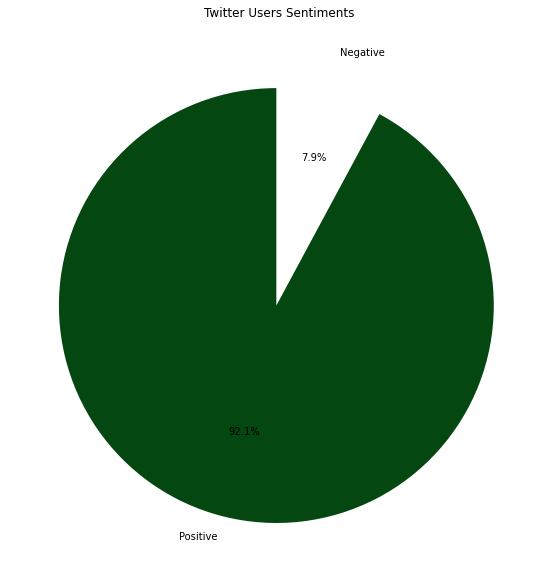

In [27]:
# Plotting a pie chart to show the distribution of Sentiments
plt.figure(figsize=[15,10], facecolor='none')
plt.pie(data, labels=['Positive', 'Negative'], colors=['#054711', '#FFFFFF'], startangle=90, explode= [0.05, 0.05], autopct='%1.1f%%');
plt.title('Twitter Users Sentiments')
plt.show()

The analysis showed a rather excited and optimistic reaction from Nigerians. Regardless of the present unpleasant happenings in the country, Nigerians surprisingly still believe in a better Country.

In [28]:
# Saving it to a dataframe
plt.savefig("Sentiments.png", format="png")

<Figure size 432x288 with 0 Axes>

In [131]:
# Generating WordClouds

# Creating function to generate the green colour for the Word CLoud


def green_color_func(word, font_size, position, orientation, random_state=None,**kwargs):
    return "hsl(99, 99%%, %d%%)" % random.randint(20, 20)

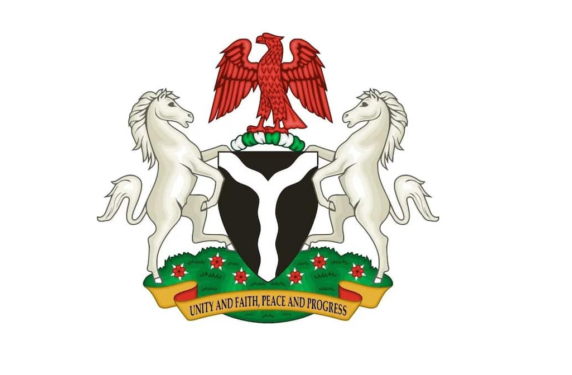

In [121]:
# Importing the Nigerian Coat of Arms Image 
image2 = np.array(Image.open('COAT OF ARMS-LOGO.jpg'))
    
# Instantiating the figure object
plt.figure(figsize=(10,8), facecolor='none')


# Displaying data as an image
plt.imshow(image2, cmap=plt.cm.gray, interpolation='bilinear') 
plt.axis('off') 
plt.show() 

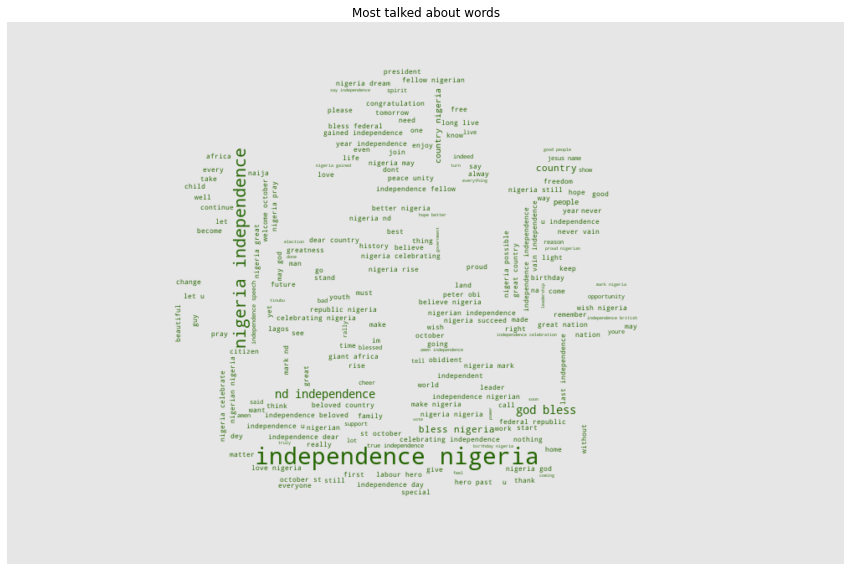

In [138]:
# Instantiating the Twitter word cloud object
twitter_wc = WordCloud(background_color='#e6e6e6', mask=image2)

# generating the word cloud
twitter_wc.generate(tweets_long_string)

# displaying the word cloud
plt.figure(figsize=(15,10), facecolor='none')


plt.imshow(twitter_wc.recolor(color_func = green_color_func, random_state=5),
           interpolation="bilinear")
plt.axis('off')
plt.title('Most talked about words')
plt.show()

In [135]:
# As shown above, the most frequent word(s) is beyonce and church girl
# Save to dataframe
plt.savefig("OCT_1st_WordCloud.png", format="jpg")

<Figure size 432x288 with 0 Axes>

In [ ]:
# Sving final tweet to a csv file
tweets_df.to_csv('Final_Tweets_OCT_1st.csv', index=False)

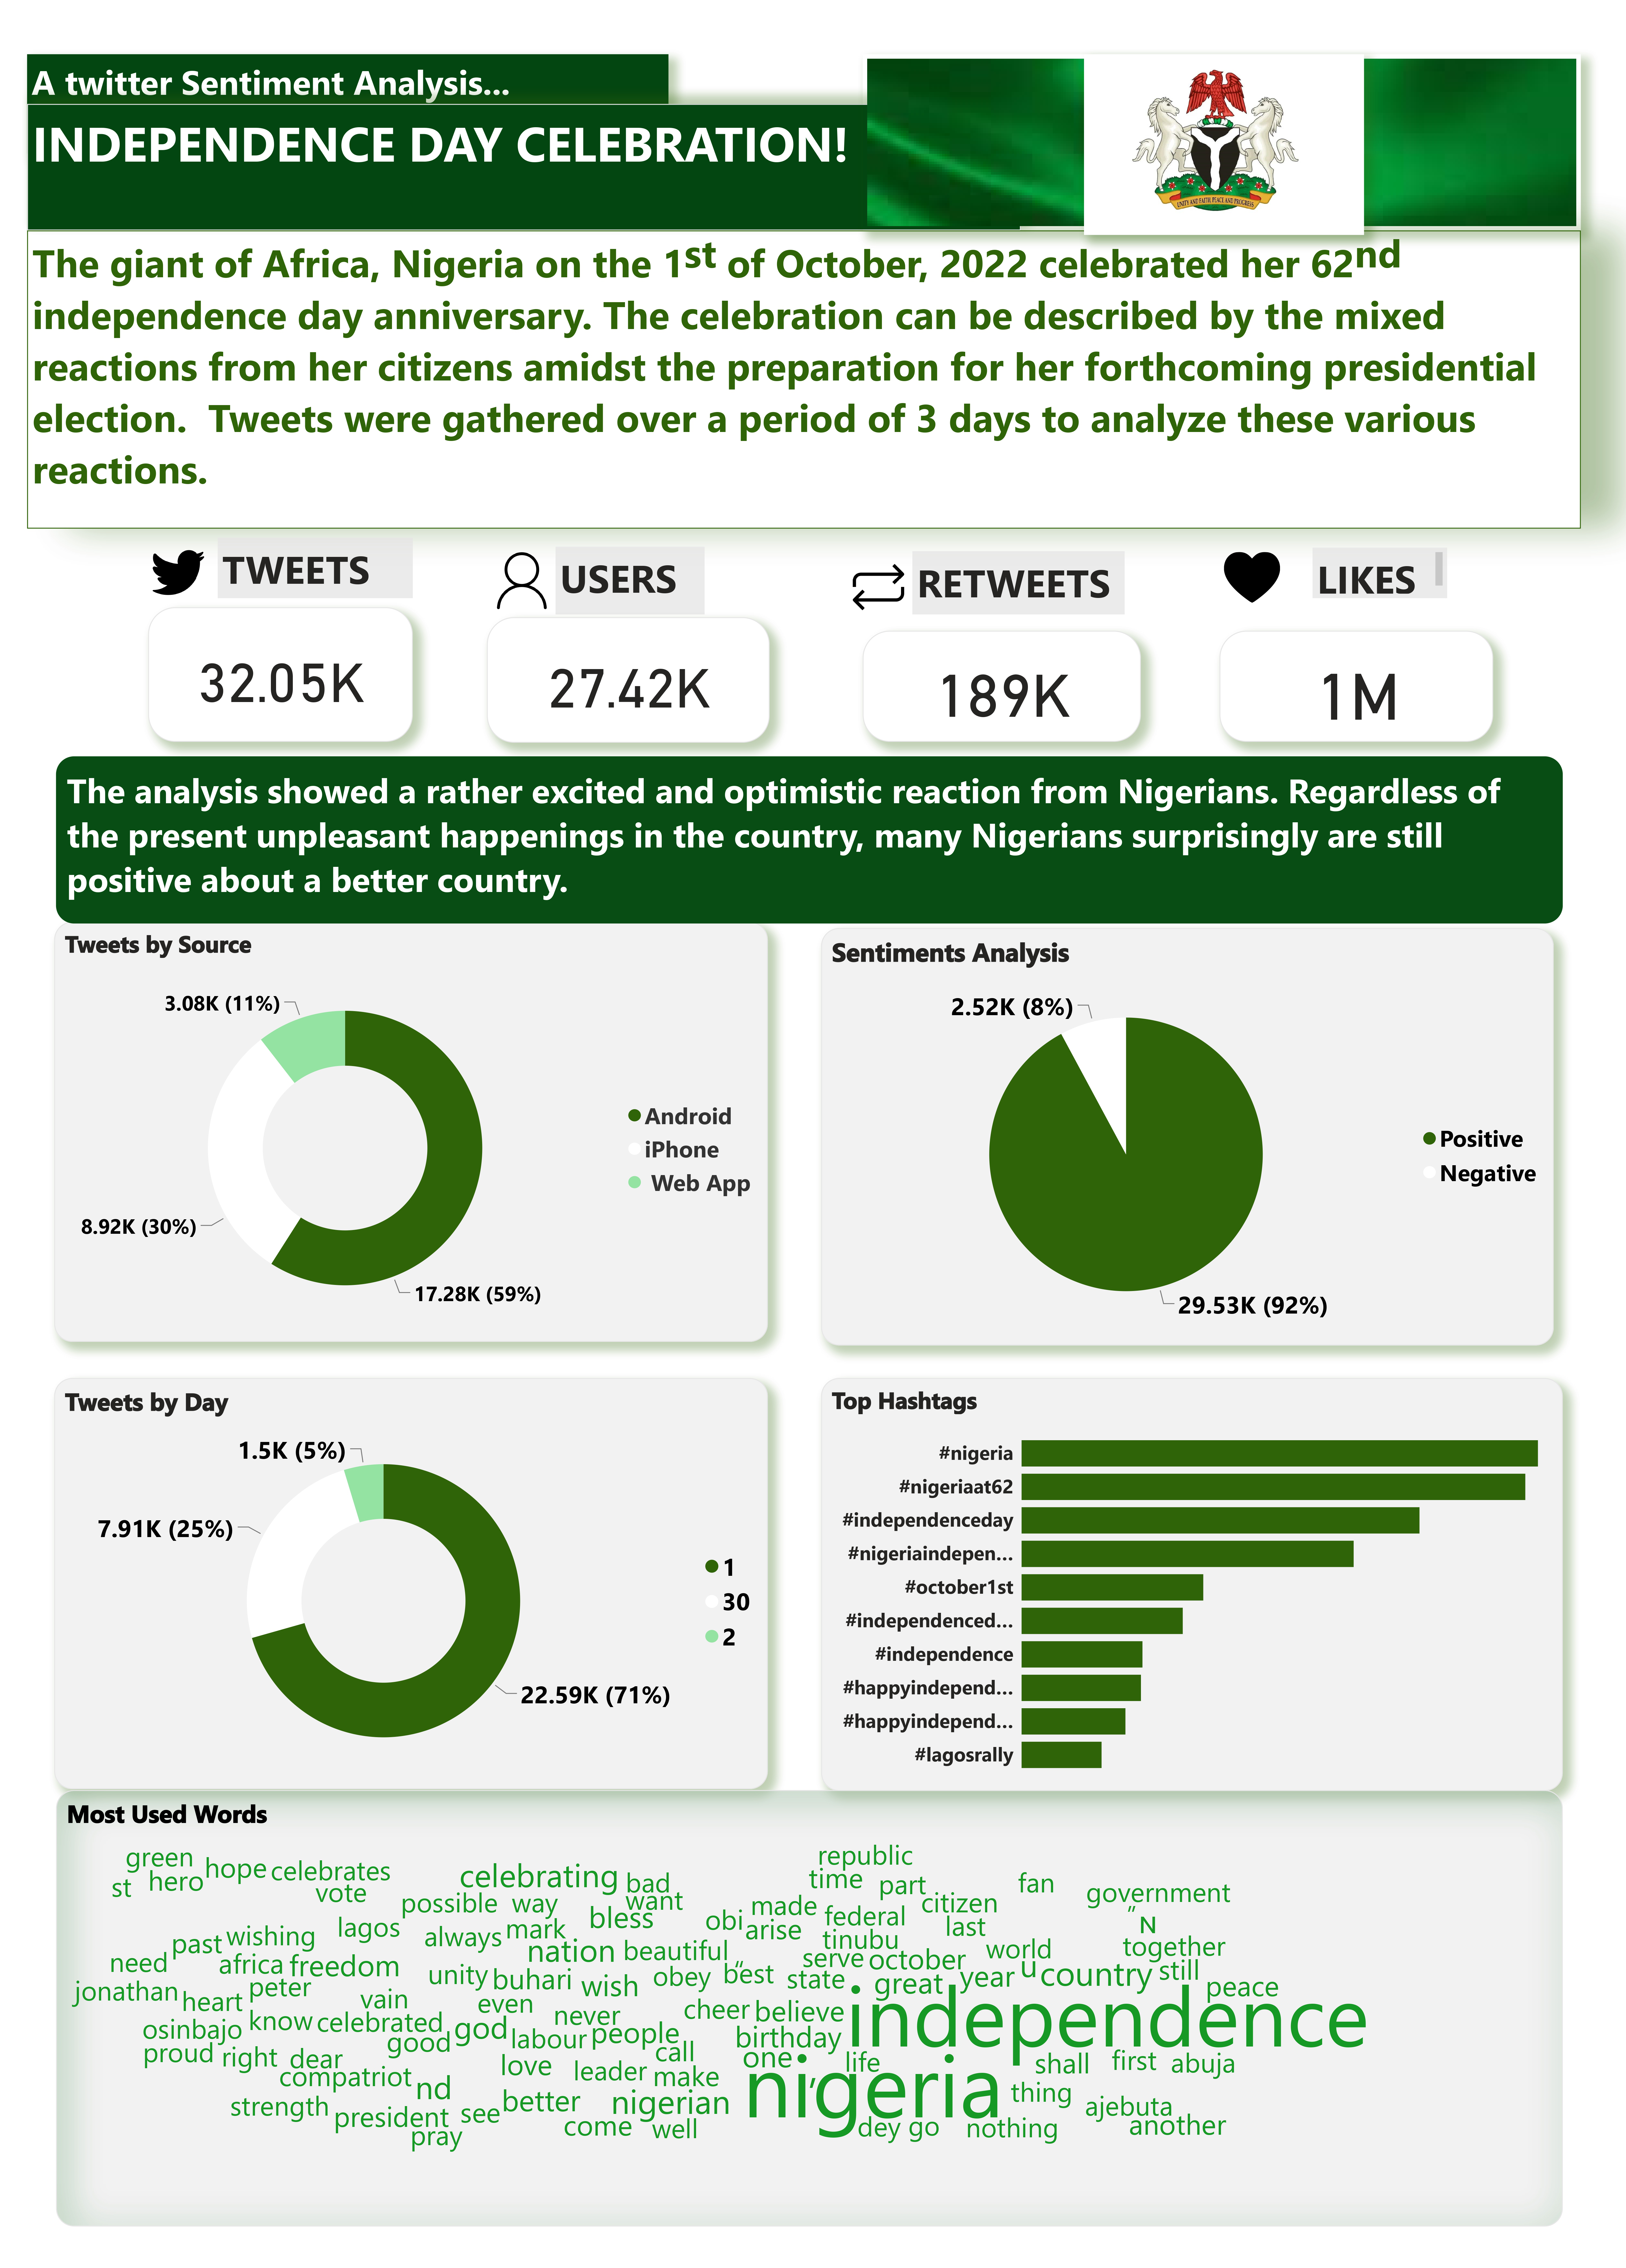

In [7]:
# Opening power BI report in  image file
df_Power_BI = Image.open("POWER BI OCT 1st_report.jpg") 
  
# Showing image in any image viewer 
df_Power_BI